In [18]:
import time
import matplotlib.pyplot as plt
import numpy as np

from simulators.clifford import GraphStateSimulator
from simulators.statevector import StatevectorSimulator
from lib.executor import Executor
from lib.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [35]:
def GHZ(n, sim):
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')

    circuit = QuantumCircuit(q, c)
    circuit.H(0)

    for i in range(n - 1):
        circuit.CX(i, i + 1)

    circuit.measure()

    exec = Executor(circuit)
    return exec.run(sim)

In [36]:
GHZ(3, GraphStateSimulator)

Counter({'000': 506, '111': 494})

In [29]:
clifford_times = []
for n in range(1, 30):
    begin = time.process_time()
    GHZ(n, GraphStateSimulator)
    end = time.process_time()
    clifford_times.append(end - begin)

In [42]:
statevector_times = []
for n in range(1, 10):
    begin = time.process_time()
    GHZ(n, StatevectorSimulator)
    end = time.process_time()
    statevector_times.append(end - begin)

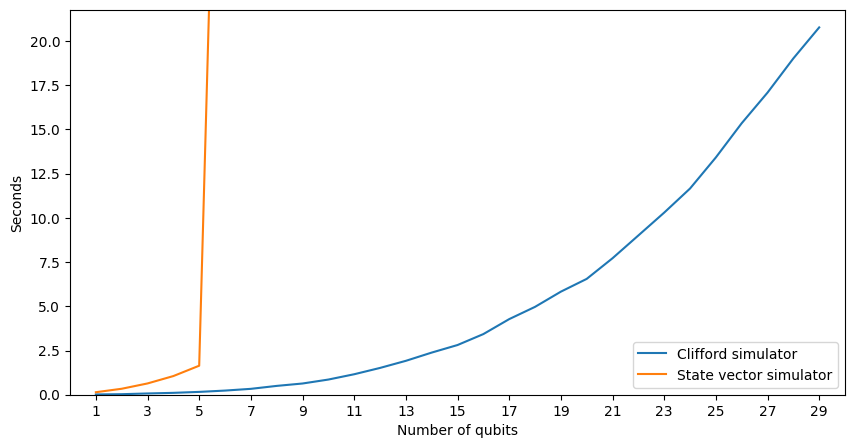

In [79]:
fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 30), clifford_times, label='Clifford simulator')
plt.plot(range(1, 10), statevector_times, label='State vector simulator')
plt.xticks(range(1, 31, 2))
plt.axis([0, 30, 0, np.max(clifford_times) + 1])
plt.xlabel('Number of qubits')
plt.ylabel('Seconds')
plt.legend();

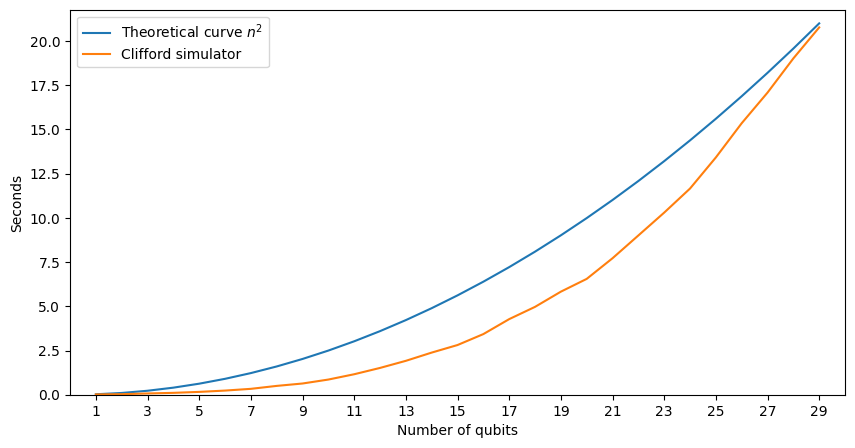

In [82]:
fig = plt.figure(figsize=(10, 5))
x = np.arange(1, 30)
y = x * x
y = (y / np.max(y)) * 21
plt.plot(x, y, label='Theoretical curve $n^2$')
plt.plot(range(1, 30), clifford_times, label='Clifford simulator')

plt.xticks(range(1, 31, 2))
plt.axis([0, 30, 0, np.max(clifford_times) + 1])
plt.xlabel('Number of qubits')
plt.ylabel('Seconds')
plt.legend();